In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("participants_dataset.csv")
df.head()

,Participant_ID,Age,Weight,Height,Weekly_Workouts,Avg_Calories_Consumed
0,P0001,20,64.4,197.7,2,3574
1,P0002,51,96.2,181.5,2,1974
2,P0003,36,107.4,187.0,7,3851
3,P0004,27,95.7,156.5,2,3424
4,P0005,23,66.2,151.9,1,2428


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Participant_ID         150 non-null    object 
 1   Age                    150 non-null    int64  
 2   Weight                 150 non-null    float64
 3   Height                 150 non-null    float64
 4   Weekly_Workouts        150 non-null    int64  
 5   Avg_Calories_Consumed  150 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.2+ KB


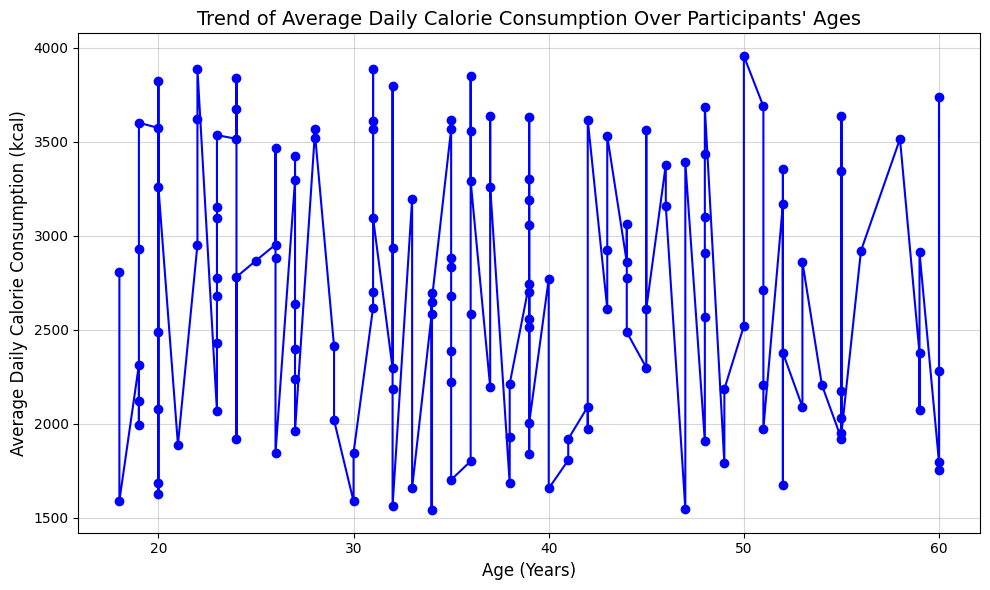

In [6]:
fitness_data_sorted = df.sort_values(by='Age')
plt.figure(figsize=(10, 6))
plt.plot(
    fitness_data_sorted['Age'], 
    fitness_data_sorted['Avg_Calories_Consumed'], 
    marker='o', 
    linestyle='-', 
    color='b'
)
plt.title('Trend of Average Daily Calorie Consumption Over Participants\' Ages', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Average Daily Calorie Consumption (kcal)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

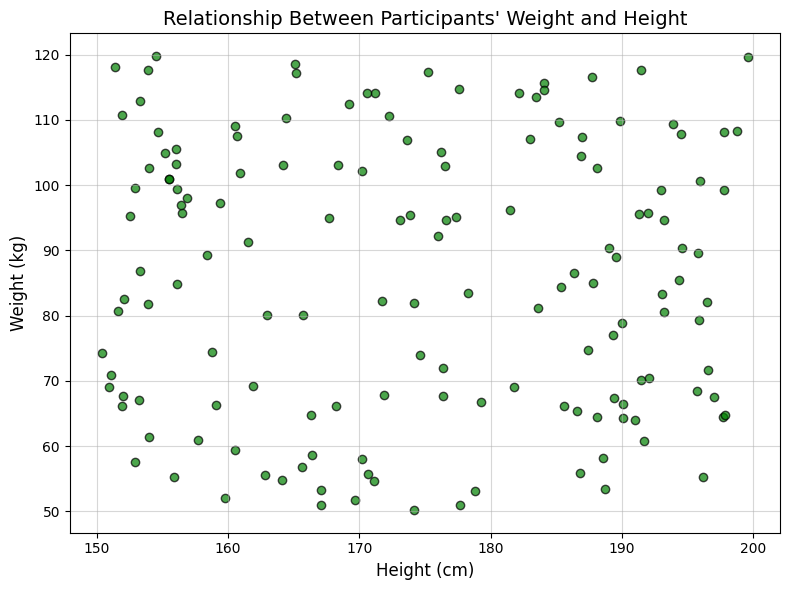

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], color='green', alpha=0.7, edgecolor='k')
plt.title('Relationship Between Participants\' Weight and Height', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

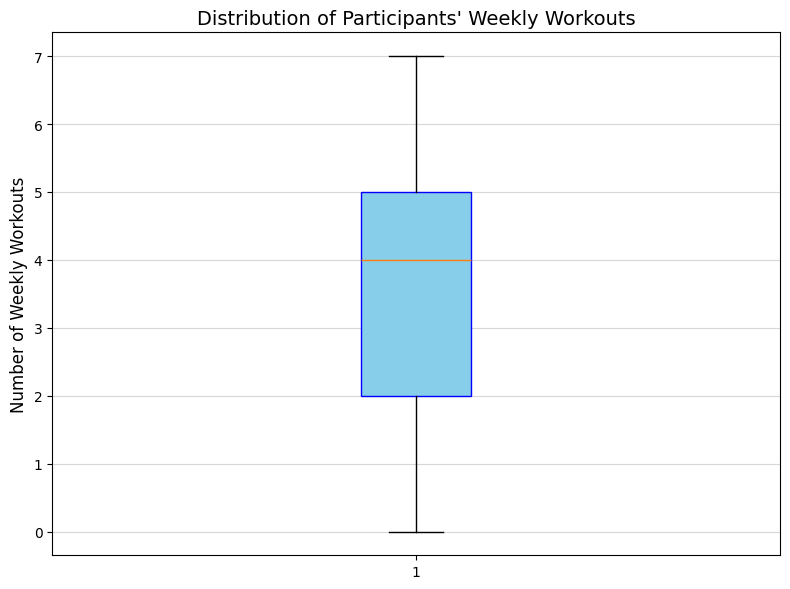

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Weekly_Workouts'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title('Distribution of Participants\' Weekly Workouts', fontsize=14)
plt.ylabel('Number of Weekly Workouts', fontsize=12)
plt.grid(axis='y', alpha=0.5)  
plt.tight_layout()
plt.show()

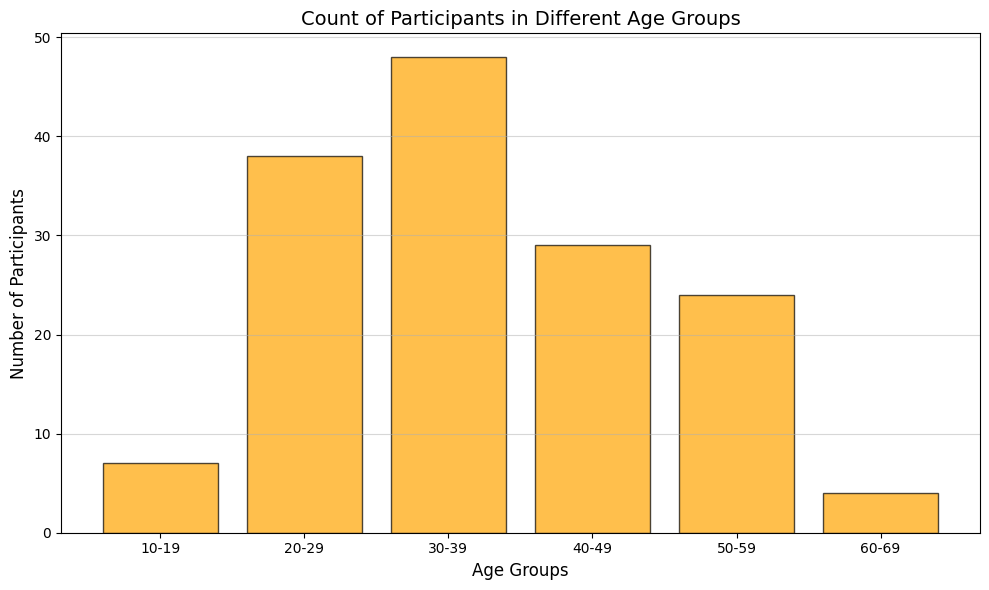

In [14]:
bins = [10, 20, 30, 40, 50, 60, 70] 
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='orange', edgecolor='k', alpha=0.7)
plt.title('Count of Participants in Different Age Groups', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

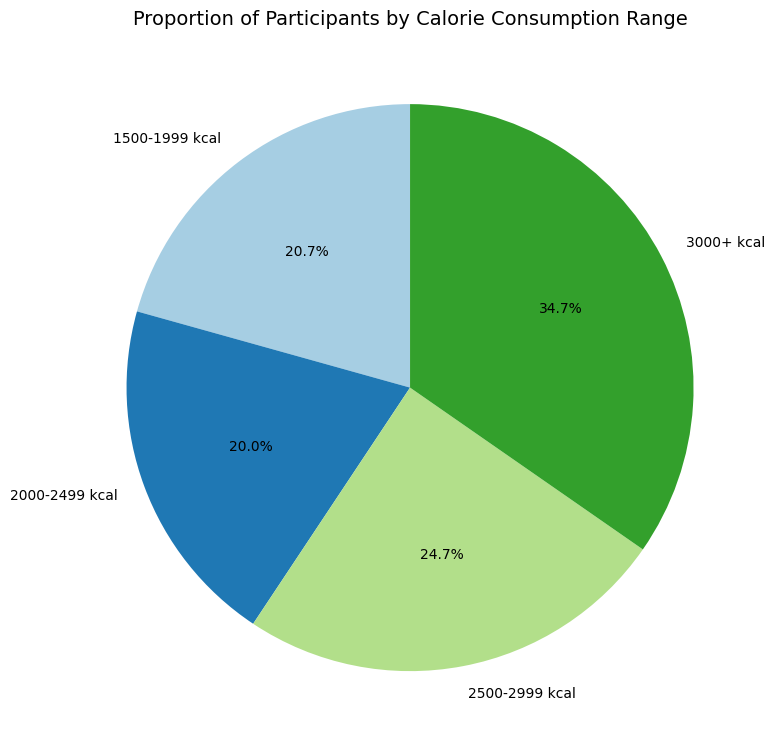

In [20]:
bins = [1500, 2000, 2500, 3000, 4000]
labels = ['1500-1999 kcal', '2000-2499 kcal', '2500-2999 kcal', '3000+ kcal']

df['Calorie_Range'] = pd.cut(df['Avg_Calories_Consumed'], bins=bins, labels=labels, right=False)
calorie_range_counts = df['Calorie_Range'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(
    calorie_range_counts.values,
    labels=calorie_range_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Proportion of Participants by Calorie Consumption Range', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
min = df["Weight"].max()
print(min)

119.8


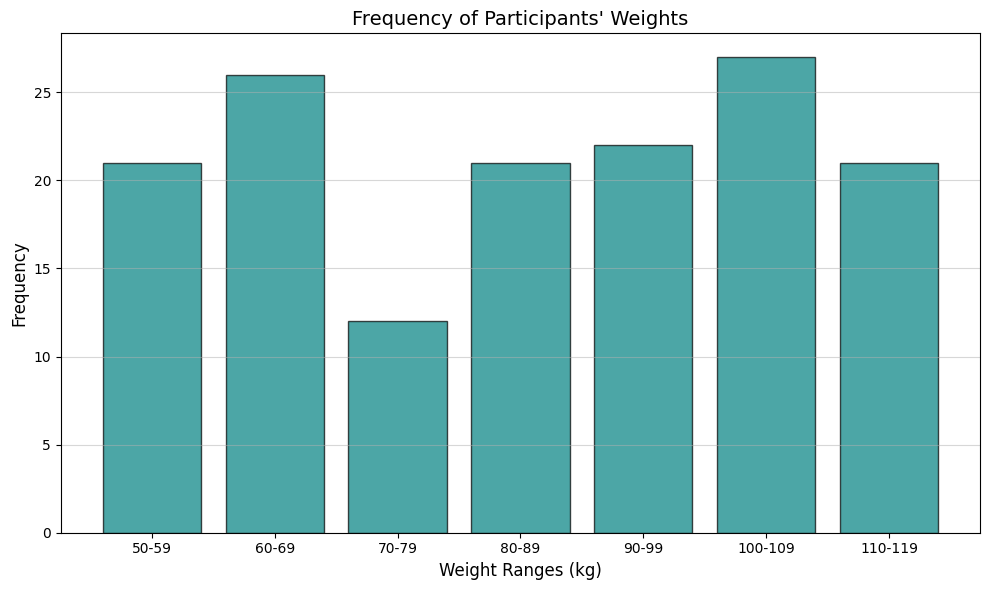

In [23]:
bins = [50, 60, 70, 80, 90, 100, 110, 120]  
labels = ['50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']

df['Weight_Range'] = pd.cut(df['Weight'], bins=bins, labels=labels, right=False)
weight_range_counts = df['Weight_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(weight_range_counts.index.astype(str), weight_range_counts.values, color='teal', edgecolor='k', alpha=0.7)
plt.title('Frequency of Participants\' Weights', fontsize=14)
plt.xlabel('Weight Ranges (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

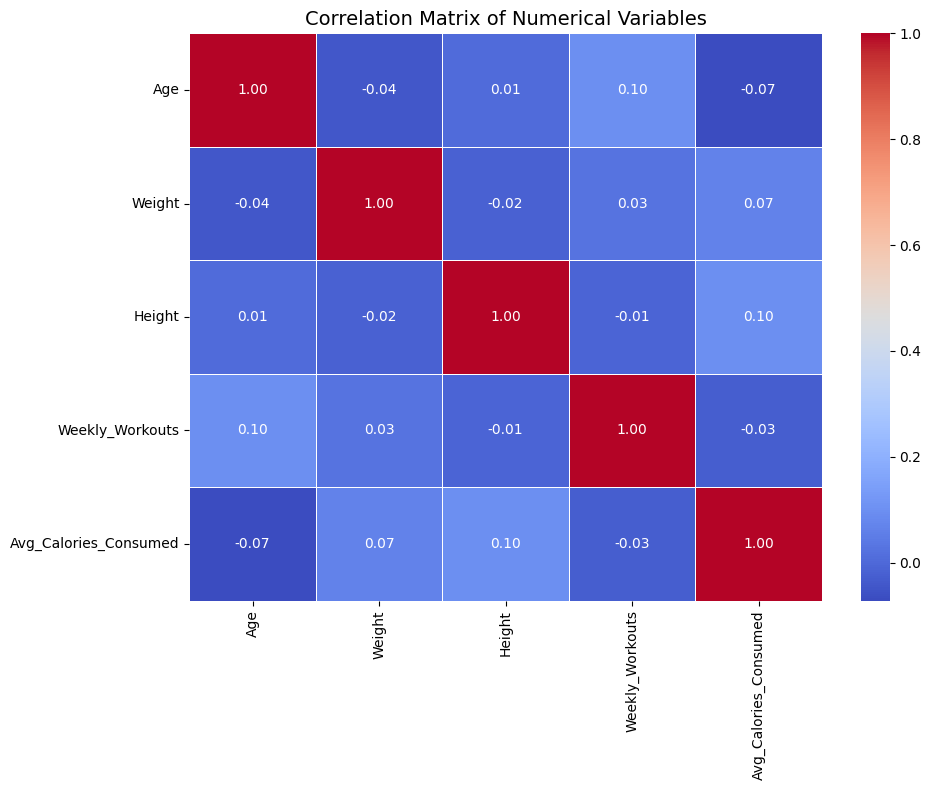

In [26]:
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical variables
correlation_matrix = numerical_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.tight_layout()
plt.show()
